In [18]:
# SETUP INSTRUCTIONS
# Run each cell below to set up environment
# Make sure to adjust subjectid and path variables
# Run pupillabs test BEFORE this protocol to ensure measurements are as expected
path_base = 'C:/Users/kebl6975/Documents/GitHub/cvd_pupillometry/subjectdata/'
# can add subject number + date
subject_id = 19
subj_base = 'sub-019/pipr-90s-binoc-sub-019_ses-01_dat-20230926' # pipr-sub-subjectID-ses-sesID-dat-date - sub-xxx-ses-xx-dat-yyyymmdd

In [2]:
# Set up stlab
from pyplr import stlab
d = stlab.SpectraTuneLab(password='2294b16eea08a15a')
d.turn_off()

LIGHT HUB login success
User authenticated as: admin
The following addresses are defined: [1, 1004, 1023]
Call get_luminaires() / get_device_info() for more info


<Response [200]>

Light engine is now set up, and so it is now possible to access the methods from the REST API. 

C:\Users\kebl6975\Documents\GitHub\cvd_pupillometry\pyplr\calibrate.py:368: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for led, df in self.data.groupby(["led"]):
C:\Users\kebl6975\Documents\GitHub\cvd_pupillometry\pyplr\calibrate.py:369: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lkp_tbl = lkp_tbl.append(self.interp_led_spectra(led, df))
C:\Users\kebl6975\Documents\GitHub\cvd_pupillometry\pyplr\calibrate.py:369: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lkp_tbl = lkp_tbl.append(self.interp_led_spectra(led, df))
C:\Users\kebl6975\Documents\GitHub\cvd_pupillometry\pyplr\calibrate.py:369: FutureWarning: The frame.append method is de

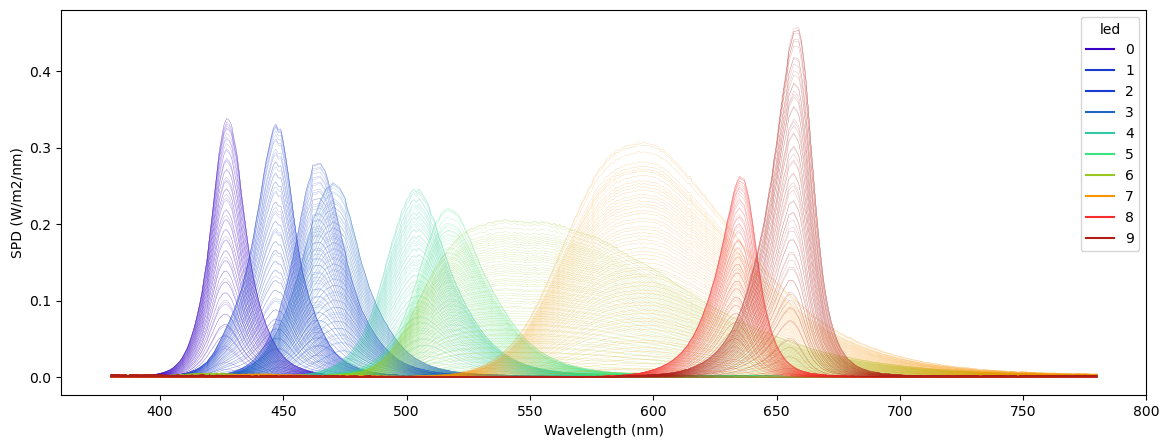

In [3]:
# from pyplr.calibrate import CalibrationContext as calibrationContext
# Calibration - important
import pyplr.calibrate as calb
from importlib import reload
reload(calb)
# file type to be read must be in format of:
# led | intensity | wavelength 1 (380) | wavelength 2 | ... | wavelength n (780)

cc = calb.CalibrationContext(
    'S2_corrected_oo_spectra.csv', binwidth=1)
_ = cc.plot_calibrated_spectra()


In [4]:
# calculate the peak spectral sensitivity for each LED at its maximum intensity setting
cc.lkp.xs(key=4095, level=1).idxmax(axis=1)

led
0    427
1    447
2    465
3    470
4    505
5    517
6    540
7    594
8    635
9    659
dtype: int64

In [5]:
blue_led = 3
red_led = 9
target_lux = 800

# Find the required intensity setting of the blue led for 800 lux
blue_intensity = (cc.lux.loc[blue_led].sub(target_lux)
                                      .abs()
                                      .idxmin())
#                                     .values[0])

# Find the intensity setting of the red led for 800 lux
red_intensity = cc.match(match_led=blue_led,
                         match_led_intensity=blue_intensity,
                         target_led=red_led,
                         match_type='irrad')[1]

C:\Users\kebl6975\Documents\GitHub\cvd_pupillometry\pyplr\CIE.py:5908: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  sss.index = pd.Int64Index(sss.index)


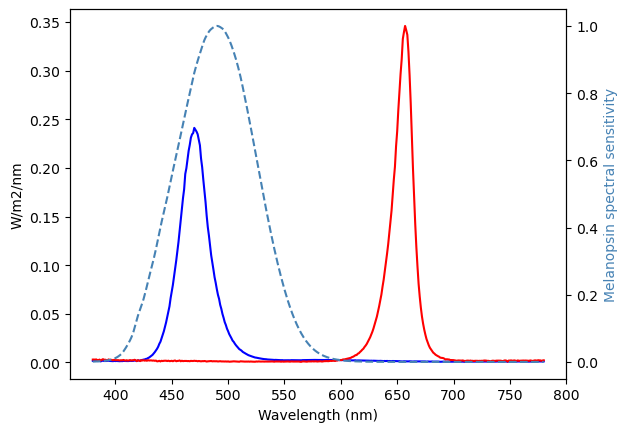

In [6]:
import matplotlib.pyplot as plt
from pyplr.CIE import get_CIES026

fig, ax = plt.subplots()
sss = get_CIES026(binwidth=1)
ax.plot(cc.lkp.loc[(blue_led, blue_intensity)], c='blue')
ax.plot(cc.lkp.loc[(red_led, red_intensity)], c='red')

ax2 = ax.twinx()
ax2.plot(sss['I'], ls='dashed', c='steelblue') # melanopsin = "I"
ax2.set_ylabel('Melanopsin spectral sensitivity', c='steelblue')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('W/m2/nm');

In [7]:
from pyplr import stlab

blue_spec, red_spec = [0]*10, [0]*10
blue_spec[blue_led] = blue_intensity
red_spec[red_led] = red_intensity
d.turn_off()

<Response [200]>

In [8]:
from time import sleep
# import random # not using this library unless we want to randomize stims
from pyplr.pupil import PupilCore
from pyplr.utils import unpack_data_pandas
from pyplr.protocol import input_subject_id, subject_dir
# Connect to Pupil Core
p = PupilCore()
p.check_3d_model()

> Refit the 3d model? [y/n]: y
> Unfreezing 3d model for eye 0
> Unfreezing 3d model for eye 1
> Ask the participant to roll their eyes
> Press "Enter" when ready to freeze the model: 
> Freezing 3d model for eye 0
> Freezing 3d model for eye 1


Please enter subject ID: 019
> Grabbing 570 seconds of pupil.1.3d
> Grabbing 570 seconds of pupil.0.3d
> Waiting for a light to stamp...
> Light stamped on frame.world at 584260.425839
> Waiting for a light to stamp...
> Light stamped on frame.world at 584351.710069
> Waiting for a light to stamp...
> Light stamped on frame.world at 584442.960235
> Waiting for a light to stamp...
> Light stamped on frame.world at 584534.2695320001
> Waiting for a light to stamp...
> Light stamped on frame.world at 584625.5234000001
> Waiting for a light to stamp...
> Light stamped on frame.world at 584716.809445
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waitin

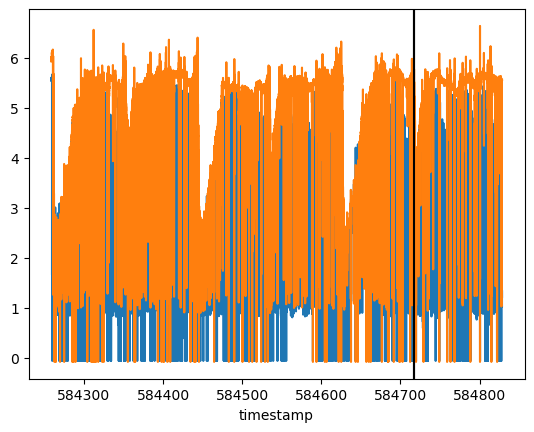

In [9]:
# PIPR STIMS - USE THIS ONE
d.turn_off()
subject_id = input_subject_id()
subj_dir = subject_dir(subject_id)
sleep(2)
ISI = 85 # interstimulus time (seconds) = this variable + 5s due to sleep + processing
num_trials = 6 # total number of trials
run_time = ISI*num_trials + 5*num_trials + 30 # appropriate offset to account for stim duration + sleeps


# Start a new recording called "my_recording"
p.command('R my_recording')

# Wait a few seconds
sleep(2)

# Make an annotation for when the light comes on
annotation = p.new_annotation('LIGHT_ON')

# Start the .light_stamper(...) and .pupil_grabber(...)
# this only captures one eye
# pgr_future = p.pupil_grabber(topic='pupil.1.3d', seconds=25) # time here is TOTAL run time
pgr_future_eye1 = p.pupil_grabber(topic='pupil.1.3d', seconds=run_time) # time here is TOTAL run time
pgr_future_eye0 = p.pupil_grabber(topic='pupil.0.3d', seconds=run_time) # time here is TOTAL run time

sleep(2)
##################################
# Administer light stimulus here #
led_list = [3,9]*3
# random.shuffle(led_list) # use this if stims should be randomized
for led in led_list:
    intensities = [0]*10
    if led == 3:
        intensities[led] = int(blue_intensity)
    else:
        intensities[led] = int(red_intensity)
    lst_future = p.light_stamper(annotation=annotation, timeout=10)
    d.set_spectrum_a(intensities)
    sleep(1.)
    d.turn_off()
    sleep(ISI)
    sleep(5) # make sure there is extra time so that trials do not overlap
##################################

# Wait for the futures
while lst_future.running() or pgr_future_eye0.running() or pgr_future_eye1.running():
    print('Waiting for futures...')
    sleep(1)

# End recording
p.command('r')

# Get the timestamp and pupil data
timestamp = lst_future.result()[1]
data_eye0 = unpack_data_pandas(pgr_future_eye0.result())
data_eye1 = unpack_data_pandas(pgr_future_eye1.result())
# timestamps are displayed in the output as well
# Plot the PLR
ax_0 = data_eye0['diameter_3d'].plot()
ax_0.axvline(x=timestamp, color='k')
ax_1 = data_eye1['diameter_3d'].plot()
ax_1.axvline(x=timestamp, color='k')

In [10]:
# display data from pandas table
data_eye0

,id,topic,method,norm_pos,diameter,confidence,sphere,projected_sphere,circle_3d,diameter_3d,ellipse,location,model_confidence,theta,phi
timestamp,,,,,,,,,,,,,,,
584258.408789,0,pupil.0.3d,pye3d 0.3.0 real-time,"[0.2424042822779752, 0.33923072376665064]",64.402717,0.787357,"{'center': [-0.471642847896126, 2.375774748870...","{'center': [92.2546376933364, 114.039805620588...","{'center': [-4.51007009509113, 2.9061980831321...",5.557483,"{'center': [46.54162219737124, 126.86770103680...","[46.54162219737124, 126.86770103680307]",1.0,1.519734,-1.970456
584258.416295,0,pupil.0.3d,pye3d 0.3.0 real-time,"[0.24181298161735998, 0.33928337364982186]",64.439925,0.787590,"{'center': [-0.471642847896126, 2.375774748870...","{'center': [92.2546376933364, 114.039805620588...","{'center': [-4.520999307481474, 2.905688473626...",5.561368,"{'center': [46.428092470533116, 126.8575922592...","[46.428092470533116, 126.85759225923421]",1.0,1.519783,-1.971598
584258.424586,0,pupil.0.3d,pye3d 0.3.0 real-time,"[0.2414746361666876, 0.33863331579440403]",64.253524,0.731420,"{'center': [-0.471642847896126, 2.375774748870...","{'center': [92.2546376933364, 114.039805620588...","{'center': [-4.526842543768011, 2.917320016949...",5.544997,"{'center': [46.36313014400402, 126.98240336747...","[46.36313014400402, 126.98240336747443]",1.0,1.518662,-1.972235
584258.432361,0,pupil.0.3d,pye3d 0.3.0 real-time,"[0.24168775052210767, 0.3395683057249407]",64.458223,0.742761,"{'center': [-0.471642847896126, 2.375774748870...","{'center': [92.2546376933364, 114.039805620588...","{'center': [-4.523319633391145, 2.900775512488...",5.563109,"{'center': [46.40404810024467, 126.80288530081...","[46.40404810024467, 126.8028853008114]",1.0,1.520257,-1.971831
584258.440240,0,pupil.0.3d,pye3d 0.3.0 real-time,"[0.2409971298358322, 0.339134994792307]",64.468826,0.730771,"{'center': [-0.471642847896126, 2.375774748870...","{'center': [92.2546376933364, 114.039805620588...","{'center': [-4.536051145033051, 2.908865930790...",5.564732,"{'center': [46.271448928479785, 126.8860809998...","[46.271448928479785, 126.88608099987705]",1.0,1.519477,-1.973181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584828.360549,0,pupil.0.3d,pye3d 0.3.0 real-time,"[0.17284189803244487, 0.39306176970988793]",15.092682,0.222775,"{'center': [-0.471642847896126, 2.375774748870...","{'center': [92.2546376933364, 114.039805620588...","{'center': [-5.7823017972610025, 2.02864736035...",1.285574,"{'center': [33.185644422229416, 116.5321402157...","[33.185644422229416, 116.53214021570152]",1.0,1.604205,-2.107497
584828.371759,0,pupil.0.3d,pye3d 0.3.0 real-time,"[0.17096489956089866, 0.40727937261117153]",13.889033,0.272759,"{'center': [-0.471642847896126, 2.375774748870...","{'center': [92.2546376933364, 114.039805620588...","{'center': [-5.822533015899746, 1.781163115704...",1.180958,"{'center': [32.825260715692544, 113.8023604586...","[32.825260715692544, 113.80236045865507]",1.0,1.628044,-2.112661
584828.379290,0,pupil.0.3d,pye3d 0.3.0 real-time,"[0.16922475895515854, 0.40010193064322985]",14.302921,0.265150,"{'center': [-0.471642847896126, 2.375774748870...","{'center': [92.2546376933364, 114.039805620588...","{'center': [-5.854447291353357, 1.908214665762...",1.217400,"{'center': [32.49115371939044, 115.18042931649...","[32.49115371939044, 115.18042931649987]",1.0,1.615803,-2.115875


In [11]:
data_eye1

,id,topic,method,norm_pos,diameter,confidence,sphere,projected_sphere,circle_3d,diameter_3d,ellipse,location,model_confidence,theta,phi
timestamp,,,,,,,,,,,,,,,
584258.408393,1,pupil.1.3d,pye3d 0.3.0 real-time,"[0.5724465479020046, 0.4325659855856482]",55.836559,1.000000,"{'center': [9.173718933845155, 5.1511227907313...","{'center': [159.89395454807794, 131.9074934276...","{'center': [2.0996698823676994, 1.746000100220...",5.929914,"{'center': [109.90973719718488, 108.9473307675...","[109.90973719718488, 108.94733076755556]",1.0,1.904620,-2.375281
584258.416296,1,pupil.1.3d,pye3d 0.3.0 real-time,"[0.572407366262239, 0.4324557018499142]",55.896984,1.000000,"{'center': [9.173718933845155, 5.1511227907313...","{'center': [159.89395454807794, 131.9074934276...","{'center': [2.09857535986304, 1.74818974406796...",5.936655,"{'center': [109.90221432234988, 108.9685052448...","[109.90221432234988, 108.96850524481647]",1.0,1.904397,-2.375362
584258.424514,1,pupil.1.3d,pye3d 0.3.0 real-time,"[0.572194836244932, 0.43235245196920014]",55.951766,1.000000,"{'center': [9.173718933845155, 5.1511227907313...","{'center': [159.89395454807794, 131.9074934276...","{'center': [2.0942330121515385, 1.750517990168...",5.943156,"{'center': [109.86140855902693, 108.9883292219...","[109.86140855902693, 108.98832922191357]",1.0,1.904160,-2.375914
584258.432352,1,pupil.1.3d,pye3d 0.3.0 real-time,"[0.5721943132760177, 0.4323389894058193]",55.913617,1.000000,"{'center': [9.173718933845155, 5.1511227907313...","{'center': [159.89395454807794, 131.9074934276...","{'center': [2.0943615764005905, 1.750869457584...",5.938851,"{'center': [109.86130814899539, 108.9909140340...","[109.86130814899539, 108.99091403408269]",1.0,1.904124,-2.375882
584258.440229,1,pupil.1.3d,pye3d 0.3.0 real-time,"[0.5721837283748578, 0.4319077837975931]",56.014432,1.000000,"{'center': [9.173718933845155, 5.1511227907313...","{'center': [159.89395454807794, 131.9074934276...","{'center': [2.093315891793101, 1.7594775930059...",5.949673,"{'center': [109.85927584797268, 109.0737055108...","[109.85927584797268, 109.07370551086213]",1.0,1.903248,-2.375721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584828.364344,1,pupil.1.3d,pye3d 0.3.0 real-time,"[0.5936256707975872, 0.36769473603907443]",53.350049,0.983869,"{'center': [9.173718933845155, 5.1511227907313...","{'center': [159.89395454807794, 131.9074934276...","{'center': [2.453612546174191, 3.0302831855168...",5.534727,"{'center': [113.97612879313675, 121.4026106804...","[113.97612879313675, 121.4026106804977]",1.0,1.776318,-2.292339
584828.372122,1,pupil.1.3d,pye3d 0.3.0 real-time,"[0.5936185201826408, 0.36735494617019904]",53.537657,0.867116,"{'center': [9.173718933845155, 5.1511227907313...","{'center': [159.89395454807794, 131.9074934276...","{'center': [2.452553701814538, 3.0368559161707...",5.554693,"{'center': [113.97475587506705, 121.4678503353...","[113.97475587506705, 121.46785033532178]",1.0,1.775672,-2.292360
584828.380219,1,pupil.1.3d,pye3d 0.3.0 real-time,"[0.593792098903917, 0.3674789717291699]",53.446292,0.978330,"{'center': [9.173718933845155, 5.1511227907313...","{'center': [159.89395454807794, 131.9074934276...","{'center': [2.4562151850105876, 3.034193079727...",5.544595,"{'center': [114.00808298955207, 121.4440374279...","[114.00808298955207, 121.44403742799938]",1.0,1.775934,-2.291928


In [12]:
import os  

# os.makedirs('C:/Users/kebl6975/Documents/GitHub/cvd_pupillometry/subjectdata', exist_ok=True) 

data_eye0.to_csv(path_base + subj_base + '-eye0.csv')
data_eye1.to_csv(path_base + subj_base + '-eye1.csv')

**DATA PROCESSING BEGINS BELOW**

In [13]:
samples_eye0 = data_eye0
samples_eye1 = data_eye1

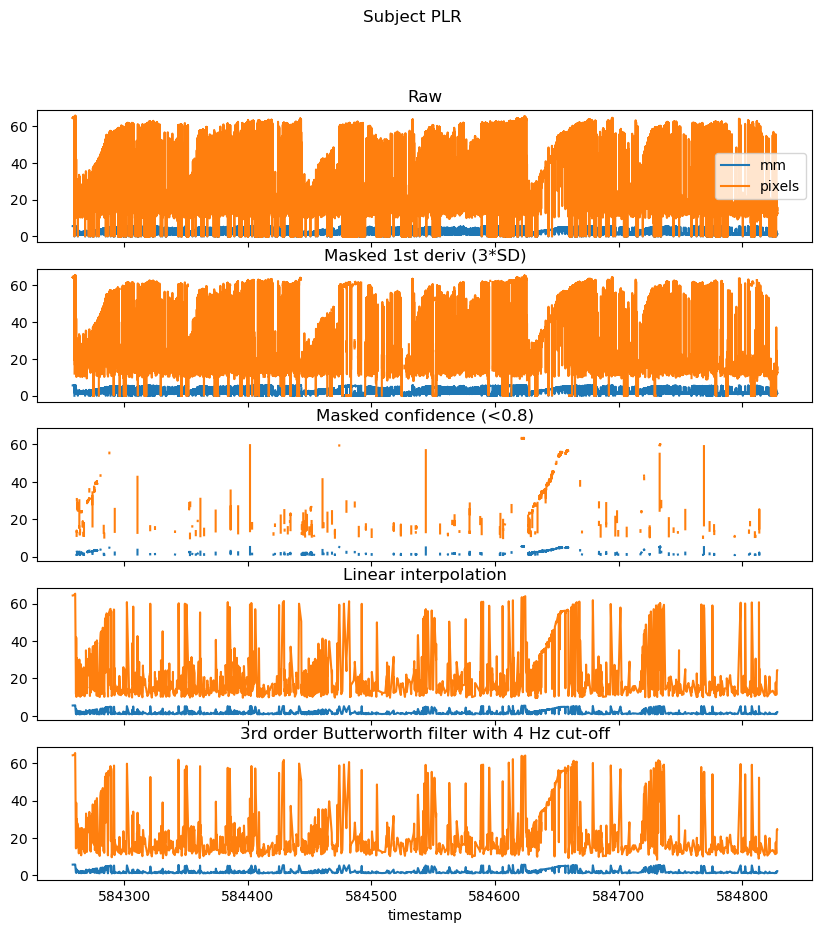

In [14]:
from pyplr import graphing
from pyplr import preproc

# Sampling frequency
SAMPLE_RATE = 120

# Pupil columns to analyse
pupil_cols = ['diameter_3d', 'diameter']

# Make figure for processing
#f, axs = graphing.pupil_preprocessing(nrows=4, subject='Example')
fig, axs = plt.subplots(5, sharex=True, figsize=(10,10))
fig.suptitle('Subject PLR')

# Plot the raw data
samples_eye0[pupil_cols].plot(title='Raw', ax=axs[0], legend=True)
axs[0].legend(loc='center right', labels=['mm', 'pixels'])

# Mask first derivative
samples_eye0 = preproc.mask_pupil_first_derivative(
    samples_eye0, threshold=3.0, mask_cols=pupil_cols)
samples_eye0[pupil_cols].plot(
    title='Masked 1st deriv (3*SD)', ax=axs[1], legend=False)

# Mask confidence
samples_eye0 = preproc.mask_pupil_confidence(
    samples_eye0, threshold=0.8, mask_cols=pupil_cols)
samples_eye0[pupil_cols].plot(
    title='Masked confidence (<0.8)', ax=axs[2], legend=False)

# Interpolate
samples_eye0 = preproc.interpolate_pupil(
    samples_eye0, interp_cols=pupil_cols)
samples_eye0[pupil_cols].plot(
    title='Linear interpolation', ax=axs[3], legend=False)

# Smooth
samples_eye0 = preproc.butterworth_series(
    samples_eye0, fields=pupil_cols, filt_order=3,
    cutoff_freq=4/(SAMPLE_RATE/2))
samples_eye0[pupil_cols].plot(
    title='3rd order Butterworth filter with 4 Hz cut-off',
    ax=axs[4], legend=False);

In [15]:
# export butterworth processed sample data for eye 0
samples_eye0.to_csv(path_base + subj_base + '-butterworth-eye0.csv') # raw data

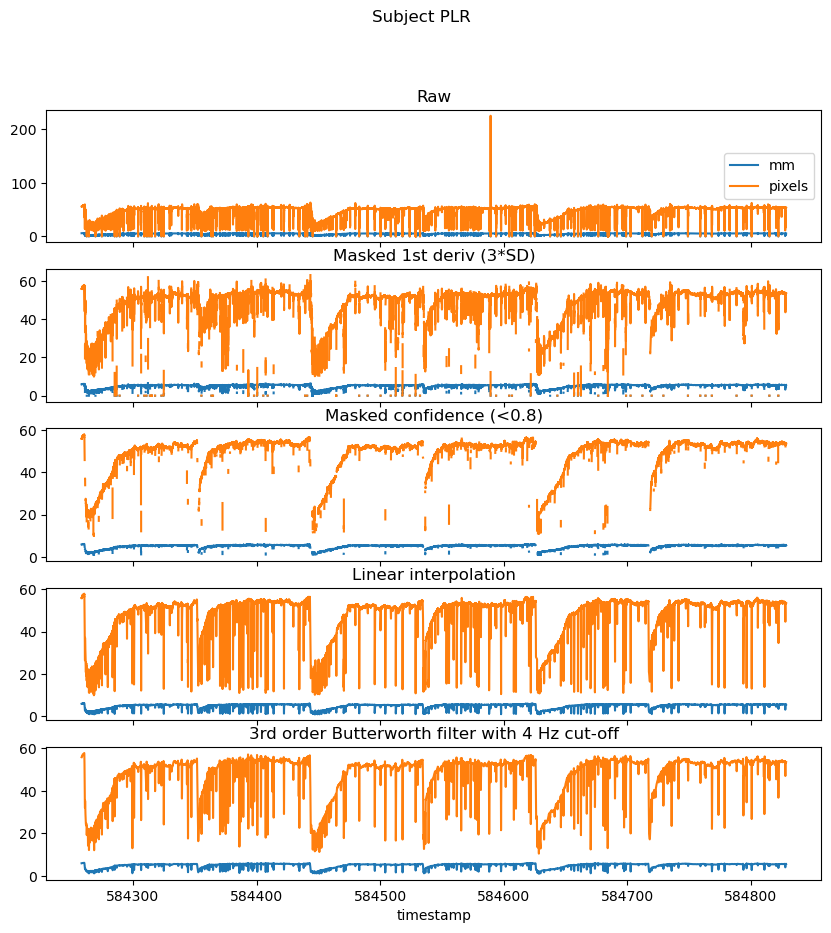

In [16]:
# Sampling frequency
SAMPLE_RATE = 120

# Pupil columns to analyse
pupil_cols = ['diameter_3d', 'diameter']

# Make figure for processing
#f, axs = graphing.pupil_preprocessing(nrows=4, subject='Example')
fig, axs = plt.subplots(5, sharex=True, figsize=(10,10))
fig.suptitle('Subject PLR')

# Plot the raw data
samples_eye1[pupil_cols].plot(title='Raw', ax=axs[0], legend=True)
axs[0].legend(loc='center right', labels=['mm', 'pixels'])

# Mask first derivative
samples_eye1 = preproc.mask_pupil_first_derivative(
    samples_eye1, threshold=3.0, mask_cols=pupil_cols)
samples_eye1[pupil_cols].plot(
    title='Masked 1st deriv (3*SD)', ax=axs[1], legend=False)

# Mask confidence
samples_eye1 = preproc.mask_pupil_confidence(
    samples_eye1, threshold=0.8, mask_cols=pupil_cols)
samples_eye1[pupil_cols].plot(
    title='Masked confidence (<0.8)', ax=axs[2], legend=False)

# Interpolate
samples_eye1 = preproc.interpolate_pupil(
    samples_eye1, interp_cols=pupil_cols)
samples_eye1[pupil_cols].plot(
    title='Linear interpolation', ax=axs[3], legend=False)

# Smooth
samples_eye1 = preproc.butterworth_series(
    samples_eye1, fields=pupil_cols, filt_order=3,
    cutoff_freq=4/(SAMPLE_RATE/2))
samples_eye1[pupil_cols].plot(
    title='3rd order Butterworth filter with 4 Hz cut-off',
    ax=axs[4], legend=False);

In [17]:
# export butterworth processed sample data for eye 1
samples_eye1.to_csv(path_base + subj_base + '-butterworth-eye1.csv') # raw data
# can stop here if necessary

**CAN STOP HERE AND DO ANALYSIS LATER**

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [20]:
# df_pipr = pd.read_csv("C:/Users/kebl6975/Documents/GitHub/cvd_pupillometry/subjectdata/sub-999_ses-02_dat-20230419.csv")
df_pipr_eye0 = pd.read_csv(path_base + subj_base + '-eye0.csv')
df_pipr_eye1 = pd.read_csv(path_base + subj_base + '-eye1.csv')

# Print header names
# print(df_pipr.columns)

# Extract the column with header "timestamp"
timestamps_eye0 = df_pipr_eye0["timestamp"]
timestamps_eye1 = df_pipr_eye1["timestamp"]
# Extract the column with header "diameter_3d"
diam_3d_eye0 = df_pipr_eye0["diameter_3d"]
diam_3d_eye1 = df_pipr_eye1["diameter_3d"]

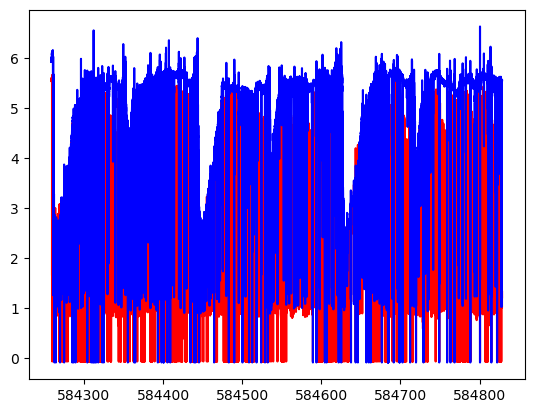

In [21]:
fig = plt.figure()
# plot eye0 in red, eye1 in blue
plt.plot(timestamps_eye0, diam_3d_eye0, 'r') # this should be the smoothed out data - if not, check
plt.plot(timestamps_eye1, diam_3d_eye1, 'b') # this should be the smoothed out data - if not, check

This is copied from the output of cell 11
> Light stamped on frame.world at 584260.425839
> Waiting for a light to stamp...
> Light stamped on frame.world at 584351.710069
> Waiting for a light to stamp...
> Light stamped on frame.world at 584442.960235
> Waiting for a light to stamp...
> Light stamped on frame.world at 584534.2695320001
> Waiting for a light to stamp...
> Light stamped on frame.world at 584625.5234000001
> Waiting for a light to stamp...
> Light stamped on frame.world at 584716.809445

**Edit Cell Below with Timestamps**

In [22]:
# NEED TO EDIT THIS WITH NEW TIMESTAMPS
# finds indices of each timestamp (or closest one before, if exact match cannot be found).
# finds list of timestamps where condition is true, extracts array of just this, then takes last value (closest stamp)
stamp1 = np.where(timestamps_eye0 <= 584260.425839)[0][-1]
stamp2 = np.where(timestamps_eye0 <= 584351.710069)[0][-1]
stamp3 = np.where(timestamps_eye0 <= 584442.960235)[0][-1]
stamp4 = np.where(timestamps_eye0 <= 584534.2695320001)[0][-1]
stamp5 = np.where(timestamps_eye0 <= 584625.5234000001)[0][-1]
stamp6 = np.where(timestamps_eye0 <= 584716.809445)[0][-1]
stamps_eye0 = [stamp1, stamp2, stamp3, stamp4, stamp5, stamp6]
stamps_eye0

[249, 10376, 20836, 31102, 41417, 51711]

In [23]:
# NEED TO EDIT THIS WITH NEW TIMESTAMPS
# finds indices of each timestamp (or closest one before, if exact match cannot be found).
# finds list of timestamps where condition is true, extracts array of just this, then takes last value (closest stamp)
stamp1 = np.where(timestamps_eye1 <= 584260.425839)[0][-1]
stamp2 = np.where(timestamps_eye1 <= 584351.710069)[0][-1]
stamp3 = np.where(timestamps_eye1 <= 584442.960235)[0][-1]
stamp4 = np.where(timestamps_eye1 <= 584534.2695320001)[0][-1]
stamp5 = np.where(timestamps_eye1 <= 584625.5234000001)[0][-1]
stamp6 = np.where(timestamps_eye1 <= 584716.809445)[0][-1]
stamps_eye1 = [stamp1, stamp2, stamp3, stamp4, stamp5, stamp6]
stamps_eye1

[250, 11120, 21914, 32662, 43467, 54223]

In [24]:
from pyplr import utils
from copy import deepcopy

In [25]:
df_data_eye0 = df_pipr_eye0[['timestamp', 'confidence','id','diameter','diameter_3d']]
df_data_eye1 = df_pipr_eye1[['timestamp', 'confidence','id','diameter','diameter_3d']]
df_data_eye1

,timestamp,confidence,id,diameter,diameter_3d
0,584258.408393,1.000000,1,55.836559,5.929914
1,584258.416296,1.000000,1,55.896984,5.936655
2,584258.424514,1.000000,1,55.951766,5.943156
3,584258.432352,1.000000,1,55.913617,5.938851
4,584258.440229,1.000000,1,56.014432,5.949673
...,...,...,...,...,...
67150,584828.364344,0.983869,1,53.350049,5.534727
67151,584828.372122,0.867116,1,53.537657,5.554693
67152,584828.380219,0.978330,1,53.446292,5.544595
67153,584828.388189,0.984360,1,53.442797,5.544084


**Extract ranges from samples based on event timing and sample count, eye 0**

Adapted from extract() from utils.py. Set variables - change as necessary. 
Note: even though ISI is 120, we only want 60s of post measurement

In [26]:
samples_eye0 = df_data_eye0
event_starts_eye0 = stamps_eye0
onset_time = 1
duration_time = 60
offset = -60*onset_time # 60 sample rate, start 1s before light to get baseline
duration = 60*duration_time  # 60 sample rate

# find the indexes of the event starts, and offset by sample count
range_idxs_eye0 = (
    np.searchsorted(samples_eye0.index, event_starts_eye0, "left") + offset
)
range_duration = duration

In [27]:
range_idxs_eye0

array([  189, 10316, 20776, 31042, 41357, 51651], dtype=int64)

In [28]:
# make a hierarchical index for eye 0
samples_eye0["orig_idx"] = samples_eye0.index
midx = pd.MultiIndex.from_product(
    [list(range(len(event_starts_eye0))), list(range(range_duration))],
    names=["event", "onset"],
)

# TODO: can add option for time index here

# get the samples
df_eye0 = pd.DataFrame()
idx = 0
for start_idx in range_idxs_eye0:
    # get the start time and add the required number of indices
    end_idx = start_idx + range_duration - 1  # .loc indexing is inclusive
    if end_idx >= len(samples_eye0):
        end_idx = len(samples_eye0) - 1
    new_df_eye0 = deepcopy(
        samples_eye0.loc[samples_eye0.index[start_idx] : samples_eye0.index[end_idx]]
    )
    #for ba in borrow_attributes:
        #new_df[ba] = events.iloc[idx].get(ba, float("nan"))
    df_eye0 = pd.concat([df_eye0, new_df_eye0])
    idx += 1
    
# if there is an error that doesn't allow the new indices to be set (size mismatch), use the if loop below
if (len(df_eye0)!= len(midx)):
    df_test = df_eye0
    temp_df = deepcopy(df_eye0.loc[df_eye0.index[-1] : df_eye0.index[-1]])
    while len(df_eye0) != len(midx):
        df_eye0= pd.concat([df_eye0, temp_df])

df_eye0.index = midx
print("Extracted ranges for {} events".format(len(event_starts_eye0)))

Extracted ranges for 6 events


C:\Users\kebl6975\AppData\Local\Temp\ipykernel_18200\2141019394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samples_eye0["orig_idx"] = samples_eye0.index


In [29]:
df_eye0.index

MultiIndex([(0,    0),
            (0,    1),
            (0,    2),
            (0,    3),
            (0,    4),
            (0,    5),
            (0,    6),
            (0,    7),
            (0,    8),
            (0,    9),
            ...
            (5, 3590),
            (5, 3591),
            (5, 3592),
            (5, 3593),
            (5, 3594),
            (5, 3595),
            (5, 3596),
            (5, 3597),
            (5, 3598),
            (5, 3599)],
           names=['event', 'onset'], length=21600)

**Extract ranges from samples based on event timing and sample count, eye 1**

Adapted from extract() from utils.py. Set variables - change as necessary. 
Note: even though ISI is 120, we only want 60s of post measurement

In [30]:
samples_eye1 = df_data_eye1
event_starts_eye1 = stamps_eye1 
onset_time = 1
duration_time = 60
offset = -60*onset_time # 60 sample rate, start 1s before light to get baseline
duration = 60*duration_time  # 60 sample rate

# find the indexes of the event starts, and offset by sample count
range_idxs_eye1 = (
    np.searchsorted(samples_eye1.index, event_starts_eye1, "left") + offset
)
range_duration = duration

In [31]:
range_idxs_eye1

array([  190, 11060, 21854, 32602, 43407, 54163], dtype=int64)

In [32]:
# make a hierarchical index for eye 1
samples_eye1["orig_idx"] = samples_eye1.index
midx = pd.MultiIndex.from_product(
    [list(range(len(event_starts_eye1))), list(range(range_duration))],
    names=["event", "onset"],
)

# TODO: can add option for time index here

# get the samples
df_eye1 = pd.DataFrame()
idx = 0
for start_idx in range_idxs_eye1:
    # get the start time and add the required number of indices
    end_idx = start_idx + range_duration - 1  # .loc indexing is inclusive
    if end_idx >= len(samples_eye1):
        end_idx = len(samples_eye1) - 1
    new_df_eye1 = deepcopy(
        samples_eye1.loc[samples_eye1.index[start_idx] : samples_eye1.index[end_idx]]
    )
    #for ba in borrow_attributes:
        #new_df[ba] = events.iloc[idx].get(ba, float("nan"))
    df_eye1 = pd.concat([df_eye1, new_df_eye1])
    idx += 1
# if there is an error that doesn't allow the new indices to be set (size mismatch), use the if loop below
if (len(df_eye1)!= len(midx)):
    df_test = df_eye1
    temp_df = deepcopy(df_eye1.loc[df_eye1.index[-1] : df_eye1.index[-1]])
    while len(df_eye1) != len(midx):
        df_eye1= pd.concat([df_eye1, temp_df])
df_eye1.index = midx
print("Extracted ranges for {} events".format(len(event_starts_eye1)))

Extracted ranges for 6 events


C:\Users\kebl6975\AppData\Local\Temp\ipykernel_18200\3597893296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samples_eye1["orig_idx"] = samples_eye1.index


In [33]:
df_eye1.index

MultiIndex([(0,    0),
            (0,    1),
            (0,    2),
            (0,    3),
            (0,    4),
            (0,    5),
            (0,    6),
            (0,    7),
            (0,    8),
            (0,    9),
            ...
            (5, 3590),
            (5, 3591),
            (5, 3592),
            (5, 3593),
            (5, 3594),
            (5, 3595),
            (5, 3596),
            (5, 3597),
            (5, 3598),
            (5, 3599)],
           names=['event', 'onset'], length=21600)

**Re-run the processing on the multi-index data, eye 0**

In [34]:
from pyplr import graphing
from pyplr import preproc
# Calculate baselines
baselines_eye0 = df_eye0.loc[:, range(0, -offset), :].mean(level=0)

# New columns for percent signal change
df_eye0 = preproc.percent_signal_change(
    df_eye0, baselines_eye0, ['diameter_3d', 'diameter'])
df_eye0

C:\Users\kebl6975\AppData\Local\Temp\ipykernel_18200\4183176285.py:4: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  baselines_eye0 = df_eye0.loc[:, range(0, -offset), :].mean(level=0)


timestamp  confidence  id   diameter  diameter_3d  orig_idx  \
event onset                                                                    
0     0      584259.937244    0.748326   0  64.661183     5.594088       189   
      1      584259.945161    0.766526   0  64.888152     5.613361       190   
      2      584259.952332    0.772720   0  64.856503     5.610904       191   
      3      584259.960357    0.738016   0  64.587385     5.587645       192   
      4      584259.970428    0.221843   0  22.210992     1.869937       193   
...                    ...         ...  ..        ...          ...       ...   
5     3595   584756.784026    0.710233   0  52.919584     4.560295     55246   
      3596   584756.793487    0.361148   0  18.447805     1.546934     55247   
      3597   584756.806636    0.455831   0  12.778621     1.055291     55248   
      3598   584756.813723    0.442933   0  13.150398     1.087397     55249   
      3599   584756.824899    0.412608   0  12.704697     1.048891     55250   

             diameter_3d_pc  diameter_pc  
event onset                               
0     0            2.685948     2.689944  
      1            3.039712     3.050399  
      2            2.994618     3.000136  
      3            2.567681     2.572744  
      4          -65.675153   -64.726202  
...                     ...          ...  
5     3595       289.732734   288.619015  
      3596        32.204386    35.472866  
      3597        -9.812548    -6.159222  
      3598        -7.068701    -3.429048  
      3599       -10.359515    -6.702085  

[21600 rows x 8 columns]

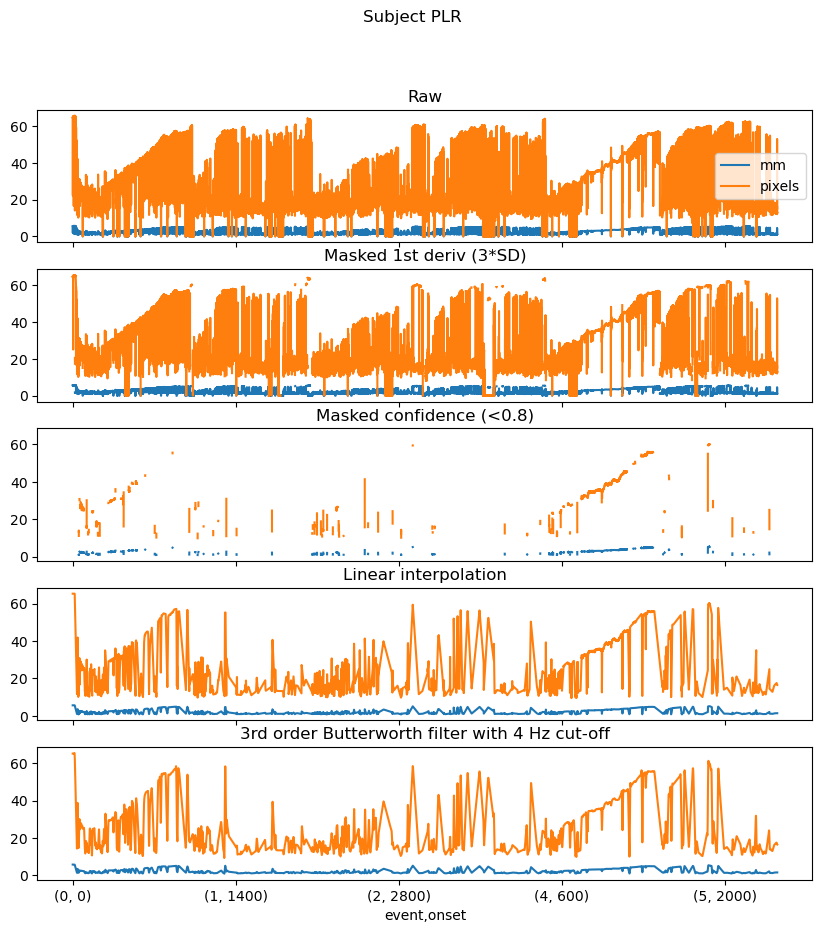

In [35]:
from pyplr import graphing
from pyplr import preproc

# Sampling frequency
SAMPLE_RATE = 120
samples_eye0 = df_eye0

# Pupil columns to analyse
pupil_cols = ['diameter_3d', 'diameter']

# Make figure for processing
#f, axs = graphing.pupil_preprocessing(nrows=4, subject='Example')
fig, axs = plt.subplots(5, sharex=True, figsize=(10,10))
fig.suptitle('Subject PLR')

# Plot the raw data
samples_eye0[pupil_cols].plot(title='Raw', ax=axs[0], legend=True)
axs[0].legend(loc='center right', labels=['mm', 'pixels'])

# Mask first derivative
samples_eye0 = preproc.mask_pupil_first_derivative(
    samples_eye0, threshold=3.0, mask_cols=pupil_cols)
samples_eye0[pupil_cols].plot(
    title='Masked 1st deriv (3*SD)', ax=axs[1], legend=False)

# Mask confidence
samples_eye0 = preproc.mask_pupil_confidence(
    samples_eye0, threshold=0.8, mask_cols=pupil_cols)
samples_eye0[pupil_cols].plot(
    title='Masked confidence (<0.8)', ax=axs[2], legend=False)

# Interpolate
samples_eye0 = preproc.interpolate_pupil(
    samples_eye0, interp_cols=pupil_cols)
samples_eye0[pupil_cols].plot(
    title='Linear interpolation', ax=axs[3], legend=False)

# Smooth
samples_eye0 = preproc.butterworth_series(
    samples_eye0, fields=pupil_cols, filt_order=3,
    cutoff_freq=4/(SAMPLE_RATE/2))
samples_eye0[pupil_cols].plot(
    title='3rd order Butterworth filter with 4 Hz cut-off',
    ax=axs[4], legend=False);

In [36]:
samples_eye0 # this now has the processed data with blinks removed
# where confidence < 0.8, it interpolates the data
# need to run these to improve the outputs
# TODO: double check what df is after this processing

timestamp  confidence  id   diameter  diameter_3d  orig_idx  \
event onset                                                                    
0     0      584259.937244    0.748326   0  65.308877     5.654967       189   
      1      584259.945161    0.766526   0  65.308871     5.654967       190   
      2      584259.952332    0.772720   0  65.308954     5.654974       191   
      3      584259.960357    0.738016   0  65.309141     5.654990       192   
      4      584259.970428    0.221843   0  65.309448     5.655016       193   
...                    ...         ...  ..        ...          ...       ...   
5     3595   584756.784026    0.710233   0  16.532342     1.435528     55246   
      3596   584756.793487    0.361148   0  16.501345     1.433963     55247   
      3597   584756.806636    0.455831   0  16.475020     1.432632     55248   
      3598   584756.813723    0.442933   0  16.453087     1.431522     55249   
      3599   584756.824899    0.412608   0  16.435174     1.430614     55250   

             diameter_3d_pc  diameter_pc  interpolated  
event onset                                             
0     0            2.685948     2.689944             1  
      1            3.039712     3.050399             1  
      2            2.994618     3.000136             1  
      3            2.567681     2.572744             1  
      4          -65.675153   -64.726202             1  
...                     ...          ...           ...  
5     3595       289.732734   288.619015             1  
      3596        32.204386    35.472866             1  
      3597        -9.812548    -6.159222             1  
      3598        -7.068701    -3.429048             1  
      3599       -10.359515    -6.702085             1  

[21600 rows x 9 columns]

In [37]:
df_eye0

timestamp  confidence  id   diameter  diameter_3d  orig_idx  \
event onset                                                                    
0     0      584259.937244    0.748326   0  64.661183     5.594088       189   
      1      584259.945161    0.766526   0  64.888152     5.613361       190   
      2      584259.952332    0.772720   0  64.856503     5.610904       191   
      3      584259.960357    0.738016   0  64.587385     5.587645       192   
      4      584259.970428    0.221843   0  22.210992     1.869937       193   
...                    ...         ...  ..        ...          ...       ...   
5     3595   584756.784026    0.710233   0  52.919584     4.560295     55246   
      3596   584756.793487    0.361148   0  18.447805     1.546934     55247   
      3597   584756.806636    0.455831   0  12.778621     1.055291     55248   
      3598   584756.813723    0.442933   0  13.150398     1.087397     55249   
      3599   584756.824899    0.412608   0  12.704697     1.048891     55250   

             diameter_3d_pc  diameter_pc  
event onset                               
0     0            2.685948     2.689944  
      1            3.039712     3.050399  
      2            2.994618     3.000136  
      3            2.567681     2.572744  
      4          -65.675153   -64.726202  
...                     ...          ...  
5     3595       289.732734   288.619015  
      3596        32.204386    35.472866  
      3597        -9.812548    -6.159222  
      3598        -7.068701    -3.429048  
      3599       -10.359515    -6.702085  

[21600 rows x 8 columns]

**Re-run processing on multi-index data, eye 1**

In [38]:
# Calculate baselines
baselines_eye1 = df_eye1.loc[:, range(0, -offset), :].mean(level=0)

# New columns for percent signal change
df_eye1 = preproc.percent_signal_change(
    df_eye1, baselines_eye1, ['diameter_3d', 'diameter'])
df_eye1

C:\Users\kebl6975\AppData\Local\Temp\ipykernel_18200\1788001868.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  baselines_eye1 = df_eye1.loc[:, range(0, -offset), :].mean(level=0)


timestamp  confidence  id   diameter  diameter_3d  orig_idx  \
event onset                                                                    
0     0      584259.940361    1.000000   1  57.352179     6.105433       190   
      1      584259.948386    1.000000   1  57.318548     6.101766       191   
      2      584259.956233    1.000000   1  57.360244     6.105628       192   
      3      584259.964334    1.000000   1  57.299279     6.099326       193   
      4      584259.972225    1.000000   1  57.227896     6.090496       194   
...                    ...         ...  ..        ...          ...       ...   
5     3595   584749.548443    0.769731   1  54.827781     5.723048     57758   
      3596   584749.556399    0.831339   1  54.920569     5.733317     57759   
      3597   584749.565816    0.850481   1  55.031242     5.745205     57760   
      3598   584749.572291    0.795349   1  54.885100     5.728894     57761   
      3599   584749.580541    0.821510   1  54.904319     5.731093     57762   

             diameter_3d_pc  diameter_pc  
event onset                               
0     0           -0.174740    -0.208073  
      1           -0.234699    -0.266590  
      2           -0.171549    -0.194040  
      3           -0.274586    -0.300119  
      4           -0.418954    -0.424324  
...                     ...          ...  
5     3595         2.580193     2.109670  
      3596         2.764258     2.282475  
      3597         2.977330     2.488590  
      3598         2.684970     2.216420  
      3599         2.724384     2.252211  

[21600 rows x 8 columns]

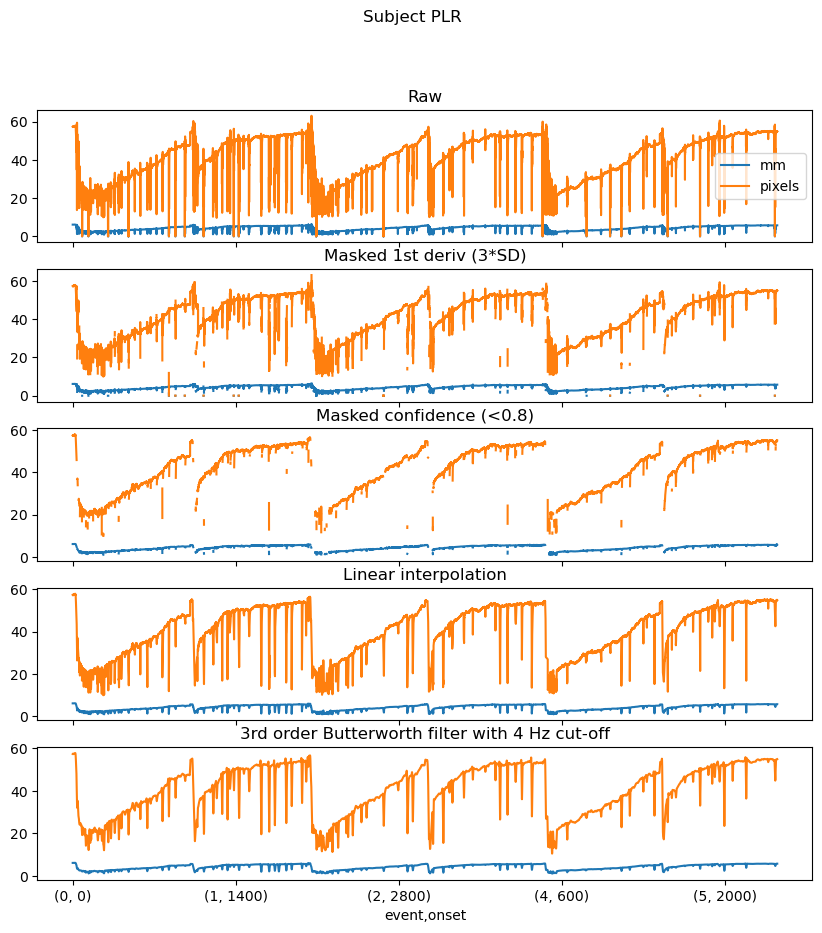

In [39]:
# Sampling frequency
SAMPLE_RATE = 120
samples_eye1 = df_eye1

# Pupil columns to analyse
pupil_cols = ['diameter_3d', 'diameter']

# Make figure for processing
#f, axs = graphing.pupil_preprocessing(nrows=4, subject='Example')
fig, axs = plt.subplots(5, sharex=True, figsize=(10,10))
fig.suptitle('Subject PLR')

# Plot the raw data
samples_eye1[pupil_cols].plot(title='Raw', ax=axs[0], legend=True)
axs[0].legend(loc='center right', labels=['mm', 'pixels'])

# Mask first derivative
samples_eye1 = preproc.mask_pupil_first_derivative(
    samples_eye1, threshold=3.0, mask_cols=pupil_cols)
samples_eye1[pupil_cols].plot(
    title='Masked 1st deriv (3*SD)', ax=axs[1], legend=False)

# Mask confidence
samples_eye1 = preproc.mask_pupil_confidence(
    samples_eye1, threshold=0.8, mask_cols=pupil_cols)
samples_eye1[pupil_cols].plot(
    title='Masked confidence (<0.8)', ax=axs[2], legend=False)

# Interpolate
samples_eye1 = preproc.interpolate_pupil(
    samples_eye1, interp_cols=pupil_cols)
samples_eye1[pupil_cols].plot(
    title='Linear interpolation', ax=axs[3], legend=False)

# Smooth
samples_eye1 = preproc.butterworth_series(
    samples_eye1, fields=pupil_cols, filt_order=3,
    cutoff_freq=4/(SAMPLE_RATE/2))
samples_eye1[pupil_cols].plot(
    title='3rd order Butterworth filter with 4 Hz cut-off',
    ax=axs[4], legend=False);

In [40]:
samples_eye1 # this now has the processed data with blinks removed
# where confidence < 0.8, it interpolates the data
# need to run these to improve the outputs
# TODO: double check what df is after this processing

timestamp  confidence  id   diameter  diameter_3d  orig_idx  \
event onset                                                                    
0     0      584259.940361    1.000000   1  57.345463     6.104806       190   
      1      584259.948386    1.000000   1  57.331497     6.103129       191   
      2      584259.956233    1.000000   1  57.318042     6.101503       192   
      3      584259.964334    1.000000   1  57.305350     6.099957       193   
      4      584259.972225    1.000000   1  57.293665     6.098517       194   
...                    ...         ...  ..        ...          ...       ...   
5     3595   584749.548443    0.769731   1  54.893348     5.730330     57758   
      3596   584749.556399    0.831339   1  54.899942     5.730935     57759   
      3597   584749.565816    0.850481   1  54.905246     5.731405     57760   
      3598   584749.572291    0.795349   1  54.909360     5.731754     57761   
      3599   584749.580541    0.821510   1  54.912431     5.731998     57762   

             diameter_3d_pc  diameter_pc  interpolated  
event onset                                             
0     0           -0.174740    -0.208073             0  
      1           -0.234699    -0.266590             0  
      2           -0.171549    -0.194040             0  
      3           -0.274586    -0.300119             0  
      4           -0.418954    -0.424324             0  
...                     ...          ...           ...  
5     3595         2.580193     2.109670             1  
      3596         2.764258     2.282475             0  
      3597         2.977330     2.488590             0  
      3598         2.684970     2.216420             1  
      3599         2.724384     2.252211             0  

[21600 rows x 9 columns]

In [41]:
df_eye1

timestamp  confidence  id   diameter  diameter_3d  orig_idx  \
event onset                                                                    
0     0      584259.940361    1.000000   1  57.352179     6.105433       190   
      1      584259.948386    1.000000   1  57.318548     6.101766       191   
      2      584259.956233    1.000000   1  57.360244     6.105628       192   
      3      584259.964334    1.000000   1  57.299279     6.099326       193   
      4      584259.972225    1.000000   1  57.227896     6.090496       194   
...                    ...         ...  ..        ...          ...       ...   
5     3595   584749.548443    0.769731   1  54.827781     5.723048     57758   
      3596   584749.556399    0.831339   1  54.920569     5.733317     57759   
      3597   584749.565816    0.850481   1  55.031242     5.745205     57760   
      3598   584749.572291    0.795349   1  54.885100     5.728894     57761   
      3599   584749.580541    0.821510   1  54.904319     5.731093     57762   

             diameter_3d_pc  diameter_pc  
event onset                               
0     0           -0.174740    -0.208073  
      1           -0.234699    -0.266590  
      2           -0.171549    -0.194040  
      3           -0.274586    -0.300119  
      4           -0.418954    -0.424324  
...                     ...          ...  
5     3595         2.580193     2.109670  
      3596         2.764258     2.282475  
      3597         2.977330     2.488590  
      3598         2.684970     2.216420  
      3599         2.724384     2.252211  

[21600 rows x 8 columns]

**Convert the index-level samples to time (s)**:

In [42]:
ONSET_IDX = 60
SAMPLE_RATE = 60
new_onset = (df_eye0.index.get_level_values('onset')
                    .unique()
            - ONSET_IDX) / SAMPLE_RATE
df_eye0.index = df_eye0.index.set_levels(
    levels=new_onset, level='onset')

In [43]:
df_eye0["colour"] = ""

In [44]:
for (event, onset) in df_eye0.index:
    if event%2==1:
        df_eye0["colour"][event,onset] = "red"
    else:
        df_eye0["colour"][event,onset] = "blue"

C:\Users\kebl6975\AppData\Local\Temp\ipykernel_18200\1670583221.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eye0["colour"][event,onset] = "blue"
C:\Users\kebl6975\AppData\Local\Temp\ipykernel_18200\1670583221.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eye0["colour"][event,onset] = "red"


In [45]:
ONSET_IDX = 60
SAMPLE_RATE = 60
new_onset = (df_eye1.index.get_level_values('onset')
                    .unique()
            - ONSET_IDX) / SAMPLE_RATE
df_eye1.index = df_eye1.index.set_levels(
    levels=new_onset, level='onset')

In [46]:
df_eye1["colour"] = ""

In [47]:
for (event, onset) in df_eye1.index:
    if event%2==1:
        df_eye1["colour"][event,onset] = "red"
    else:
        df_eye1["colour"][event,onset] = "blue"

C:\Users\kebl6975\AppData\Local\Temp\ipykernel_18200\2599913087.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eye1["colour"][event,onset] = "blue"
C:\Users\kebl6975\AppData\Local\Temp\ipykernel_18200\2599913087.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eye1["colour"][event,onset] = "red"


**Plot the PIPR:**

Text(0.5, 1.0, 'Subject = 0')

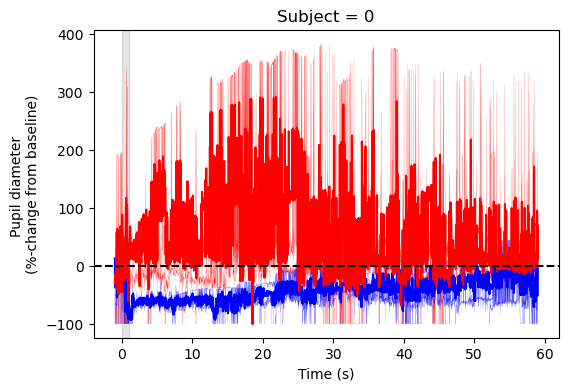

In [48]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(6,4))
for r in range(5):
    if (r==0 or r%2==0):
        c = 'blue'
    else:
        c = 'red'
    df_eye0.loc[r, 'diameter_pc'].plot(
        color=c, lw='.1', ax=ax, legend=False)

# Now show the means
avgs_eye0 = (df_eye0.reset_index()
                .groupby(['colour','onset'], as_index=False)
                .mean())
sns.lineplot(data=avgs_eye0, x='onset', y='diameter_pc', hue='colour',
                palette={'blue':'b','red':'r'}, legend=False)

# Tweak figures
ax.axvspan(0, 1, color='k', alpha=.1)
ax.axhline(0, 0, 1, color='k', ls='--')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Pupil diameter \n(%-change from baseline)')
ax.set_title('Subject = {}'.format(df_eye0['id'][0][0]))

In [49]:
import os
if not os.path.exists(path_base + 'figures'):
    os.makedirs(path_base + 'figures')
# Save the figure in the folder
fig.savefig(path_base + 'figures/' + 'pipr-90s-binoc-sub-019_ses-01_dat-20230926' + '-eye0.png')

In [50]:
df_eye0 # check all is as expected before sending to csv

timestamp  confidence  id   diameter  diameter_3d  \
event onset                                                               
0     -1.000000   584259.937244    0.748326   0  64.661183     5.594088   
      -0.983333   584259.945161    0.766526   0  64.888152     5.613361   
      -0.966667   584259.952332    0.772720   0  64.856503     5.610904   
      -0.950000   584259.960357    0.738016   0  64.587385     5.587645   
      -0.933333   584259.970428    0.221843   0  22.210992     1.869937   
...                         ...         ...  ..        ...          ...   
5      58.916667  584756.784026    0.710233   0  52.919584     4.560295   
       58.933333  584756.793487    0.361148   0  18.447805     1.546934   
       58.950000  584756.806636    0.455831   0  12.778621     1.055291   
       58.966667  584756.813723    0.442933   0  13.150398     1.087397   
       58.983333  584756.824899    0.412608   0  12.704697     1.048891   

                  orig_idx  diameter_3d_pc  diameter_pc colour  
event onset                                                     
0     -1.000000        189        2.685948     2.689944   blue  
      -0.983333        190        3.039712     3.050399   blue  
      -0.966667        191        2.994618     3.000136   blue  
      -0.950000        192        2.567681     2.572744   blue  
      -0.933333        193      -65.675153   -64.726202   blue  
...                    ...             ...          ...    ...  
5      58.916667     55246      289.732734   288.619015    red  
       58.933333     55247       32.204386    35.472866    red  
       58.950000     55248       -9.812548    -6.159222    red  
       58.966667     55249       -7.068701    -3.429048    red  
       58.983333     55250      -10.359515    -6.702085    red  

[21600 rows x 9 columns]

In [51]:
df_eye0.to_csv(path_base + subj_base + '-processed-eye0.csv') # processed data with adjusted onset indices (time in seconds)

<AxesSubplot: xlabel='event,onset'>

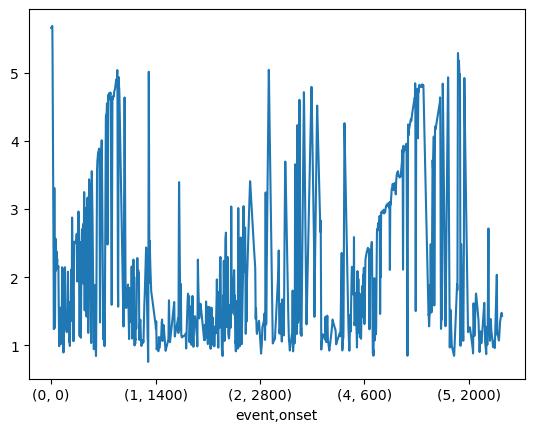

In [52]:
samples_eye0["diameter_3d"].plot()

In [53]:
avgs_eye0.to_csv(path_base + subj_base + '-average-pipr-eye0.csv') # processed data with adjusted onset indices (time in seconds)

In [54]:
df_eye1

timestamp  confidence  id   diameter  diameter_3d  \
event onset                                                               
0     -1.000000   584259.940361    1.000000   1  57.352179     6.105433   
      -0.983333   584259.948386    1.000000   1  57.318548     6.101766   
      -0.966667   584259.956233    1.000000   1  57.360244     6.105628   
      -0.950000   584259.964334    1.000000   1  57.299279     6.099326   
      -0.933333   584259.972225    1.000000   1  57.227896     6.090496   
...                         ...         ...  ..        ...          ...   
5      58.916667  584749.548443    0.769731   1  54.827781     5.723048   
       58.933333  584749.556399    0.831339   1  54.920569     5.733317   
       58.950000  584749.565816    0.850481   1  55.031242     5.745205   
       58.966667  584749.572291    0.795349   1  54.885100     5.728894   
       58.983333  584749.580541    0.821510   1  54.904319     5.731093   

                  orig_idx  diameter_3d_pc  diameter_pc colour  
event onset                                                     
0     -1.000000        190       -0.174740    -0.208073   blue  
      -0.983333        191       -0.234699    -0.266590   blue  
      -0.966667        192       -0.171549    -0.194040   blue  
      -0.950000        193       -0.274586    -0.300119   blue  
      -0.933333        194       -0.418954    -0.424324   blue  
...                    ...             ...          ...    ...  
5      58.916667     57758        2.580193     2.109670    red  
       58.933333     57759        2.764258     2.282475    red  
       58.950000     57760        2.977330     2.488590    red  
       58.966667     57761        2.684970     2.216420    red  
       58.983333     57762        2.724384     2.252211    red  

[21600 rows x 9 columns]

Text(0.5, 1.0, 'Subject = 1')

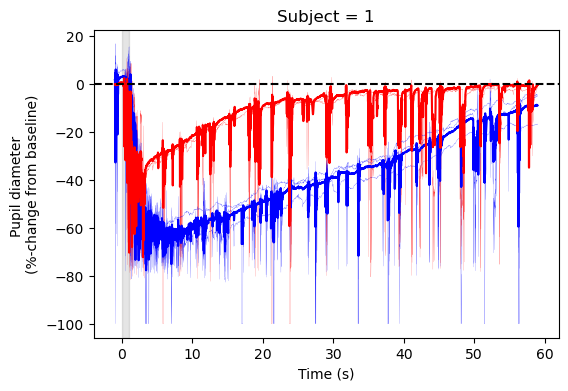

In [55]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(6,4))
for r in range(5):
    if (r==0 or r%2==0):
        c = 'blue'
    else:
        c = 'red'
    df_eye1.loc[r, 'diameter_pc'].plot(
        color=c, lw='.1', ax=ax, legend=False)

# Now show the means
avgs_eye1 = (df_eye1.reset_index()
                .groupby(['colour','onset'], as_index=False)
                .mean())
sns.lineplot(data=avgs_eye1, x='onset', y='diameter_pc', hue='colour',
                palette={'blue':'b','red':'r'}, legend=False)

# Tweak figures
ax.axvspan(0, 1, color='k', alpha=.1)
ax.axhline(0, 0, 1, color='k', ls='--')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Pupil diameter \n(%-change from baseline)')
ax.set_title('Subject = {}'.format(df_eye1['id'][0][0]))

In [56]:
if not os.path.exists(path_base + 'figures'):
    os.makedirs(path_base + 'figures')
# Save the figure in the folder
fig.savefig(path_base + 'figures/' + 'pipr-90s-binoc-sub-019_ses-01_dat-20230926' + '-eye1.png')

In [57]:
df_eye1 # check all is as expected before sending to csv

timestamp  confidence  id   diameter  diameter_3d  \
event onset                                                               
0     -1.000000   584259.940361    1.000000   1  57.352179     6.105433   
      -0.983333   584259.948386    1.000000   1  57.318548     6.101766   
      -0.966667   584259.956233    1.000000   1  57.360244     6.105628   
      -0.950000   584259.964334    1.000000   1  57.299279     6.099326   
      -0.933333   584259.972225    1.000000   1  57.227896     6.090496   
...                         ...         ...  ..        ...          ...   
5      58.916667  584749.548443    0.769731   1  54.827781     5.723048   
       58.933333  584749.556399    0.831339   1  54.920569     5.733317   
       58.950000  584749.565816    0.850481   1  55.031242     5.745205   
       58.966667  584749.572291    0.795349   1  54.885100     5.728894   
       58.983333  584749.580541    0.821510   1  54.904319     5.731093   

                  orig_idx  diameter_3d_pc  diameter_pc colour  
event onset                                                     
0     -1.000000        190       -0.174740    -0.208073   blue  
      -0.983333        191       -0.234699    -0.266590   blue  
      -0.966667        192       -0.171549    -0.194040   blue  
      -0.950000        193       -0.274586    -0.300119   blue  
      -0.933333        194       -0.418954    -0.424324   blue  
...                    ...             ...          ...    ...  
5      58.916667     57758        2.580193     2.109670    red  
       58.933333     57759        2.764258     2.282475    red  
       58.950000     57760        2.977330     2.488590    red  
       58.966667     57761        2.684970     2.216420    red  
       58.983333     57762        2.724384     2.252211    red  

[21600 rows x 9 columns]

In [58]:
df_eye1.to_csv(path_base + subj_base + '-processed-eye1.csv') # processed data with adjusted onset indices (time in seconds)

<AxesSubplot: xlabel='event,onset'>

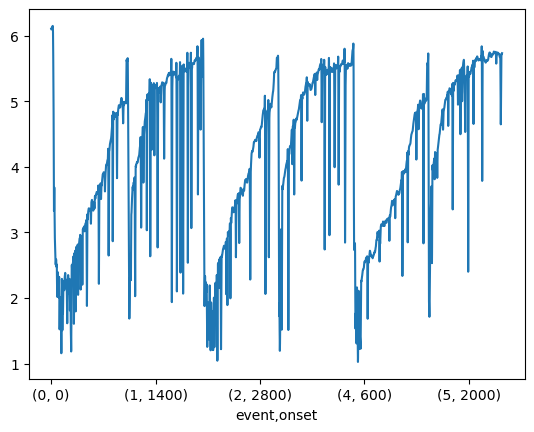

In [59]:
samples_eye1["diameter_3d"].plot()

In [60]:
avgs_eye1.to_csv(path_base + subj_base + '-average-pipr-eye1.csv') # processed data with adjusted onset indices (time in seconds)

**Compute the pupillary light response (optional, skip for now):**

In [ ]:
# adapt this to separate red and blue
from pyplr.plr import PLR

average_plr = df.mean(level=1)['diameter_3d'].to_numpy()
plr = PLR(average_plr,
          sample_rate=60,
          onset_idx=-offset,
          stim_duration=1)

In [ ]:
fig = plr.plot(vel=True, acc=True, print_params=True)

In [ ]:
params = plr.parameters()
params

**Compute the PIPR:**

In [61]:
# code to calculate PIPR at given time
pipr_time = 7 # measure PIPR at t=7s (6s after stimulus turned off)
print(avgs_eye0.loc[avgs_eye0["onset"] == pipr_time])
print(avgs_eye1.loc[avgs_eye1["onset"] == pipr_time])

     colour  onset  event      timestamp  confidence   id   diameter  \
480    blue    7.0    2.0  584446.843803    0.618316  0.0  19.810160   
4080    red    7.0    3.0  584539.041267    0.519654  0.0  27.592632   

      diameter_3d  orig_idx  diameter_3d_pc  diameter_pc  
480      1.696537   21254.0      -58.763276   -58.578364  
4080     2.375089   31483.0      102.071016    96.601867  
     colour  onset  event      timestamp  confidence   id   diameter  \
480    blue    7.0    2.0  584447.362926    0.746624  1.0  18.019805   
4080    red    7.0    3.0  584539.009510    0.961091  1.0  39.316722   

      diameter_3d      orig_idx  diameter_3d_pc  diameter_pc  
480      1.789044  22297.000000      -68.558915   -66.526809  
4080     4.076166  33088.333333      -27.412496   -27.536934  


In [62]:
# eye 0
blue_d_pipr_eye0 = avgs_eye0["diameter_3d"][480]
red_d_pipr_eye0 = avgs_eye0["diameter_3d"][4080]
blue_d_pipr_pc_eye0 = avgs_eye0["diameter_3d_pc"][480]
red_d_pipr_pc_eye0 = avgs_eye0["diameter_3d_pc"][4080]
pipr_diff_eye0 = red_d_pipr_eye0 - blue_d_pipr_eye0
pipr_pc_diff_eye0 = red_d_pipr_pc_eye0 - blue_d_pipr_pc_eye0
print("PIPR (Absolute Difference), Eye 0: ", pipr_diff_eye0)
print("PIPR (Percent Change), Eye 0: ", pipr_pc_diff_eye0)

PIPR (Absolute Difference), Eye 0:  0.6785516967099428
PIPR (Percent Change), Eye 0:  160.8342920740492


In [63]:
# eye 1
blue_d_pipr_eye1 = avgs_eye1["diameter_3d"][480]
red_d_pipr_eye1 = avgs_eye1["diameter_3d"][4080]
blue_d_pipr_pc_eye1 = avgs_eye1["diameter_3d_pc"][480]
red_d_pipr_pc_eye1 = avgs_eye1["diameter_3d_pc"][4080]
pipr_diff_eye1 = red_d_pipr_eye1 - blue_d_pipr_eye1
pipr_pc_diff_eye1 = red_d_pipr_pc_eye1 - blue_d_pipr_pc_eye1
print("PIPR (Absolute Difference), Eye 1: ", pipr_diff_eye1)
print("PIPR (Percent Change), Eye 1: ", pipr_pc_diff_eye1)

PIPR (Absolute Difference), Eye 1:  2.2871221679430107
PIPR (Percent Change), Eye 1:  41.14641936544291
